In [1]:
import cogsworth
import gala.potential as gp
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [3]:
p = cogsworth.pop.Population(n_binaries=100, processes=4, m1_cutoff=0,
                             final_kstar1=list(range(16)), final_kstar2=list(range(16)),
                             sfh_model=cogsworth.sfh.Wagg2022,
                             galactic_potential=gp.MilkyWayPotential(), v_dispersion=5 * u.km / u.s,
                             max_ev_time=12.0 * u.Gyr, timestep_size=1 * u.Myr,
                             BSE_settings={}, sampling_params={}, store_entire_orbits=True)

In [4]:
p = cogsworth.pop.Population(n_binaries=1000, processes=4, max_ev_time=12.0 * u.Gyr)

In [5]:
# now let's get the initital stellar population
p.sample_initial_binaries()
p._initial_binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,0.0,0.0,0.454137,0.269836,136.436940,0.672778,0.002255,6043.449826,0.454137,0.269836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,1.0,0.0,1.238211,0.154405,58.130854,0.183112,0.008985,9865.193773,1.238211,0.154405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.0,0.0,0.476738,0.380884,25924.461353,0.062449,0.007950,7735.486802,0.476738,0.380884,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.0,0.0,0.319376,0.314172,63.501849,0.310255,0.012929,7379.777892,0.319376,0.314172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.0,0.0,0.131066,0.085927,88.457758,0.173081,0.016422,5569.597771,0.131066,0.085927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0.0,0.0,0.366547,0.158655,9.587090,0.115096,0.003740,2647.105810,0.366547,0.158655,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1242,0.0,0.0,0.362244,0.149089,255.582449,0.001017,0.003191,10488.061039,0.362244,0.149089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1243,0.0,0.0,0.333982,0.266537,207.675360,0.126096,0.009596,8392.086112,0.333982,0.266537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1244,0.0,0.0,0.335721,0.157264,8672.760963,0.869353,0.003631,11723.623362,0.335721,0.157264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


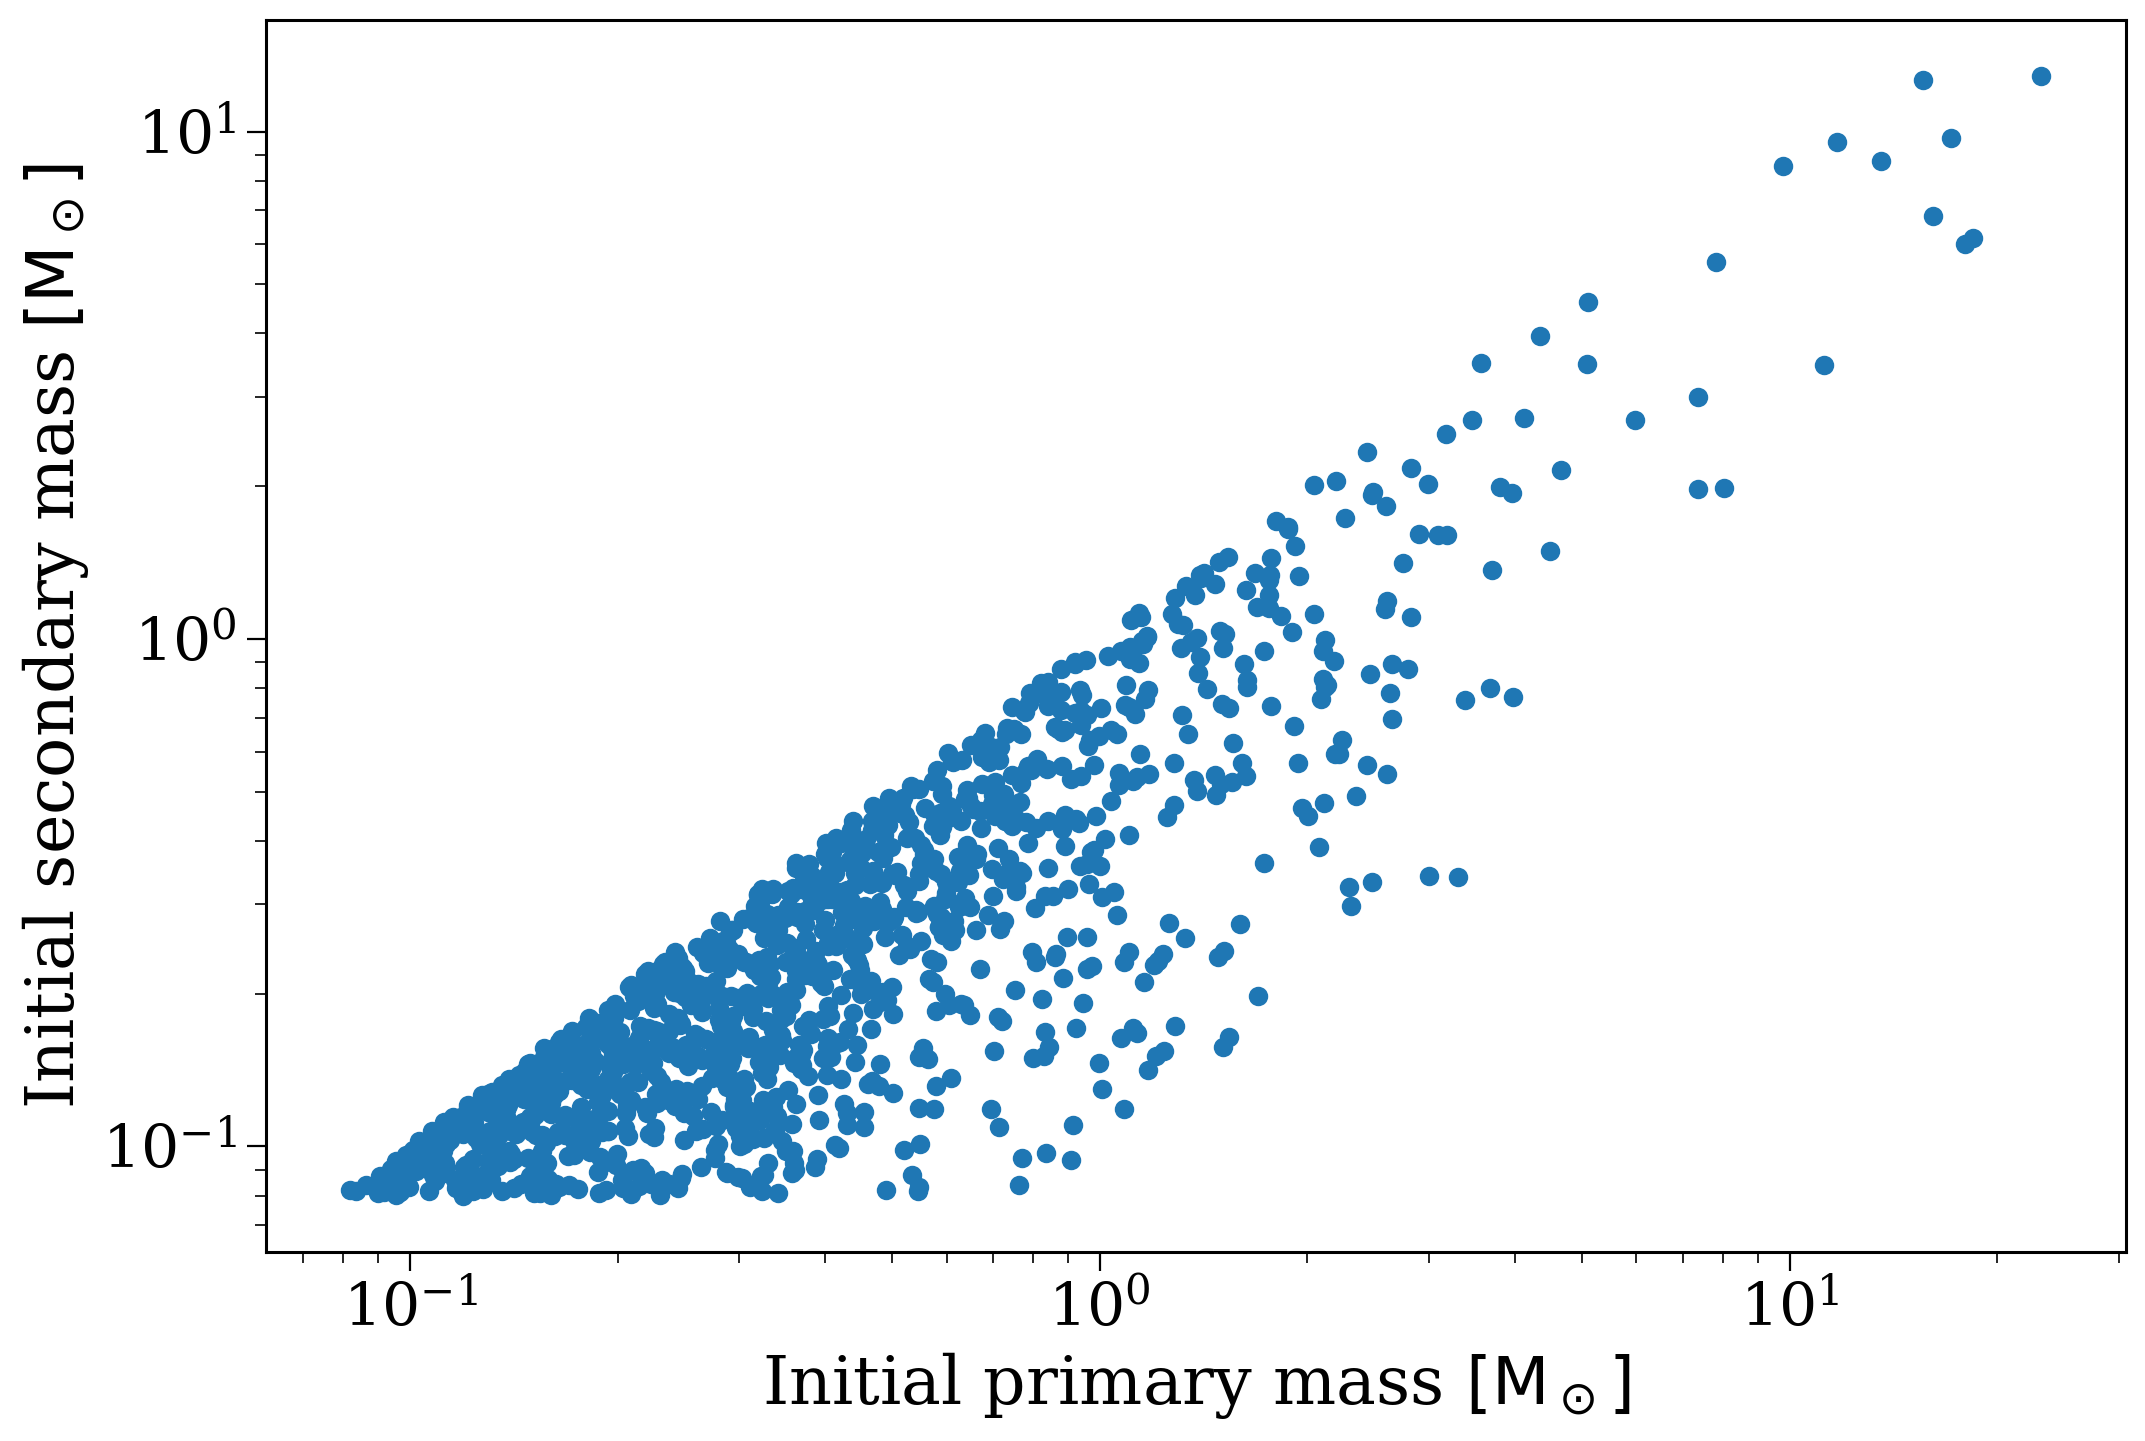

In [6]:
fig, ax = plt.subplots()
ax.scatter(p._initial_binaries["mass_1"], p._initial_binaries["mass_2"])
ax.set(xscale="log", yscale="log",
       xlabel=r"Initial primary mass $[\rm M_\odot]$", ylabel=r"Initial secondary mass $[\rm M_\odot]$")
plt.show()

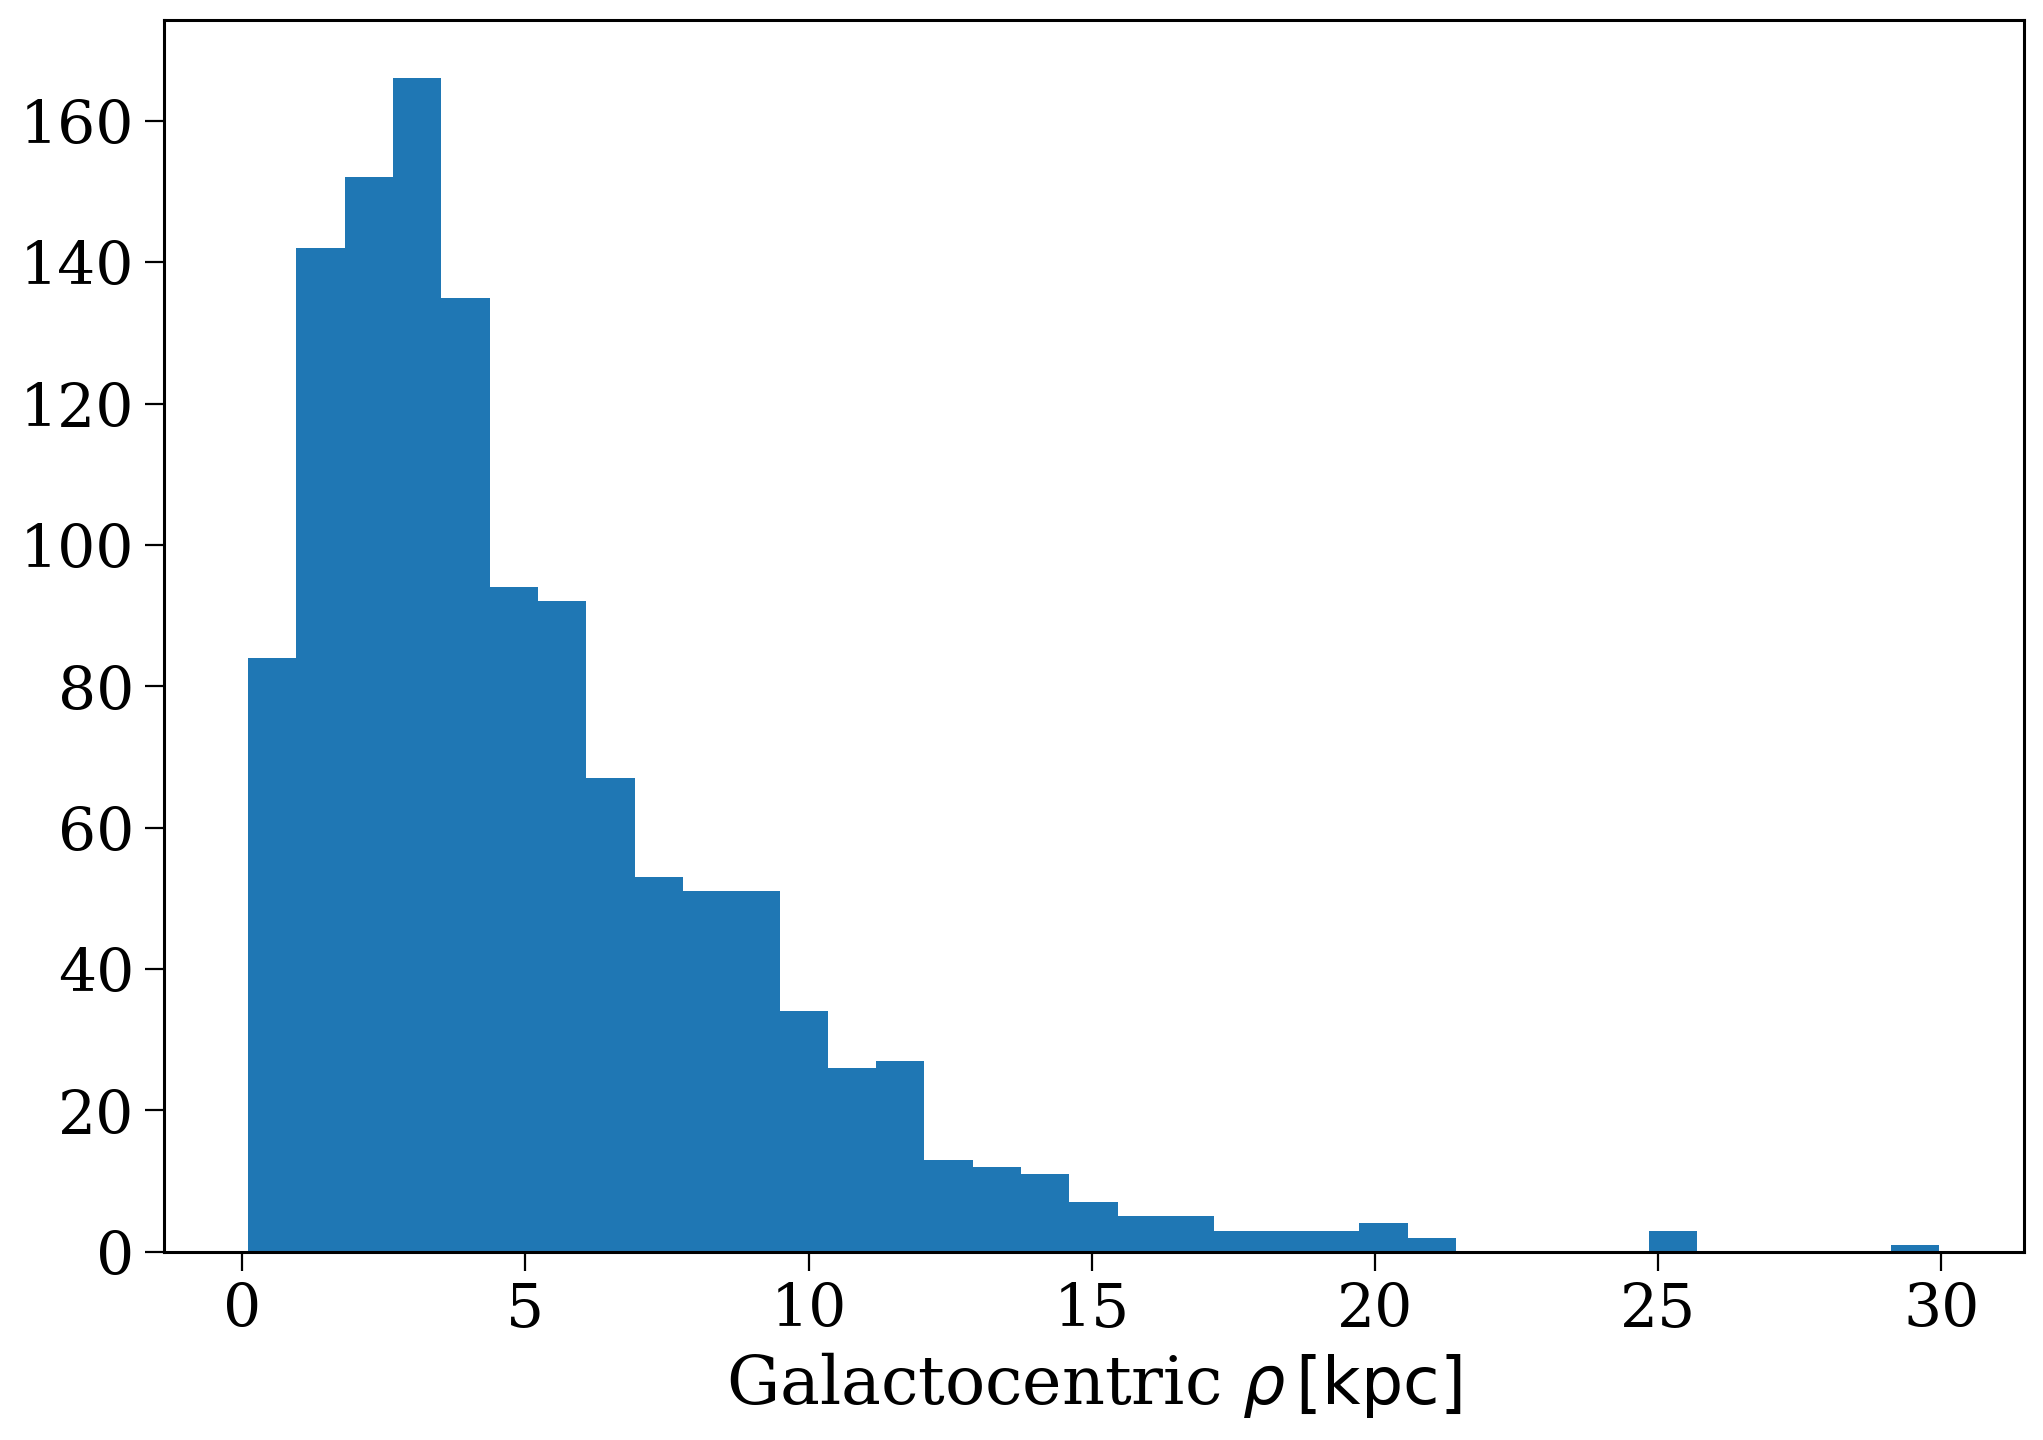

In [7]:
# first let's sample the initial galaxy
p.sample_initial_galaxy()

# and check distributions look normal
plt.hist(p.initial_galaxy.rho.value, bins="fd");
plt.xlabel(r"Galactocentric $\rho \, [\rm kpc]$");

In [8]:
p.perform_stellar_evolution()
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.454137,0.269836,0.0,0.0,100.110751,136.436940,0.672778,0.029493,0.025052,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
0,6043.449826,0.454137,0.269836,0.0,0.0,100.110640,136.436713,0.672778,0.029836,0.025140,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
1,0.000000,1.238211,0.154405,1.0,0.0,70.496384,58.130854,0.183112,0.036921,0.014803,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
1,4535.531323,1.238211,0.154405,2.0,0.0,70.496377,58.130845,0.183112,0.067118,0.014812,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
1,4757.444433,1.237755,0.154405,3.0,0.0,70.519462,58.168933,0.183112,0.085670,0.014806,...,0.000000e+00,0.0,0.0,0.0,0.0,-5.812259,0.005115,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,15.011707,1.667496,14.832846,13.0,4.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.000000e+00,0.0,0.0,0.0,0.0,12.871669,2.801159,0.0,0.0,1245
1245,16.377792,1.667496,8.836013,13.0,5.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.000000e+00,0.0,0.0,0.0,0.0,12.871669,2.801159,0.0,0.0,1245
1245,16.433568,1.667496,4.864651,13.0,5.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.000000e+00,0.0,0.0,0.0,0.0,12.871669,2.801159,0.0,0.0,1245
1245,16.433568,1.667496,1.649363,13.0,13.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.000000e+00,0.0,0.0,0.0,0.0,12.871669,16.433568,0.0,0.0,1245


In [9]:
# print out some evolution information for the most massive binary
# we'll cover more on how this masking works in the next few tutorials
p.bpp.loc[p.initC[p.initC["mass_1"] == p.initC["mass_1"].max()]["bin_num"].iloc[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
779,0.000000,23.181123,12.893141,1.0,1.0,119.746330,25.285220,0.341972,0.179803,0.164495,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,779
779,7.932635,22.466587,12.877525,2.0,1.0,122.209585,26.337317,0.341803,0.459664,0.209690,...,0.0,0.0,0.0,0.0,0.0,-0.158272,-0.007998,0.0,0.0,779
779,7.936020,22.463801,12.877667,2.0,1.0,80.444549,14.066136,0.000000,1.000716,0.209698,...,0.0,0.0,0.0,0.0,0.0,-0.158272,-0.007864,0.0,0.0,779
779,7.945407,21.083709,14.246909,4.0,1.0,73.188361,12.208423,0.000000,9.825387,0.228507,...,0.0,0.0,0.0,0.0,0.0,-0.158272,1.760166,0.0,0.0,779
779,7.962287,6.633056,28.669247,4.0,1.0,166.997850,42.095625,0.000000,0.847948,0.092529,...,0.0,0.0,0.0,0.0,0.0,-0.158272,6.584853,0.0,0.0,779
779,7.968663,6.591403,28.701537,7.0,1.0,166.654921,41.971593,0.000000,0.016701,0.092724,...,0.0,0.0,0.0,0.0,0.0,7.944353,6.586222,0.0,0.0,779
779,8.894030,5.611967,28.540783,8.0,1.0,172.167174,44.800705,0.000000,0.015164,0.095626,...,0.0,0.0,0.0,0.0,0.0,7.859707,6.576963,0.0,0.0,779
779,8.956664,5.485398,28.529560,8.0,1.0,172.851738,45.159364,0.000000,0.015164,0.095626,...,0.0,0.0,0.0,0.0,0.0,7.859707,6.576144,0.0,0.0,779
779,8.956664,1.949276,28.529560,13.0,1.0,-1.000000,-1.000000,-1.000000,0.000000,-2.000000,...,0.0,0.0,0.0,0.0,0.0,8.956664,6.576144,0.0,0.0,779
779,13.047021,1.949276,27.423323,13.0,2.0,-1.000000,-1.000000,-1.000000,0.000100,0.000100,...,0.0,0.0,0.0,0.0,0.0,8.956664,6.411652,0.0,0.0,779


In [10]:
p.perform_galactic_evolution()
p.orbits

1255it [00:09, 136.27it/s]                          


array([<Orbit cartesian, dim=3, shape=(11906,)>,
       <Orbit cartesian, dim=3, shape=(8308,)>,
       <Orbit cartesian, dim=3, shape=(2898,)>, ...,
       <Orbit cartesian, dim=3, shape=(8766,)>,
       <Orbit cartesian, dim=3, shape=(8550,)>,
       <Orbit cartesian, dim=3, shape=(11186,)>], dtype=object)

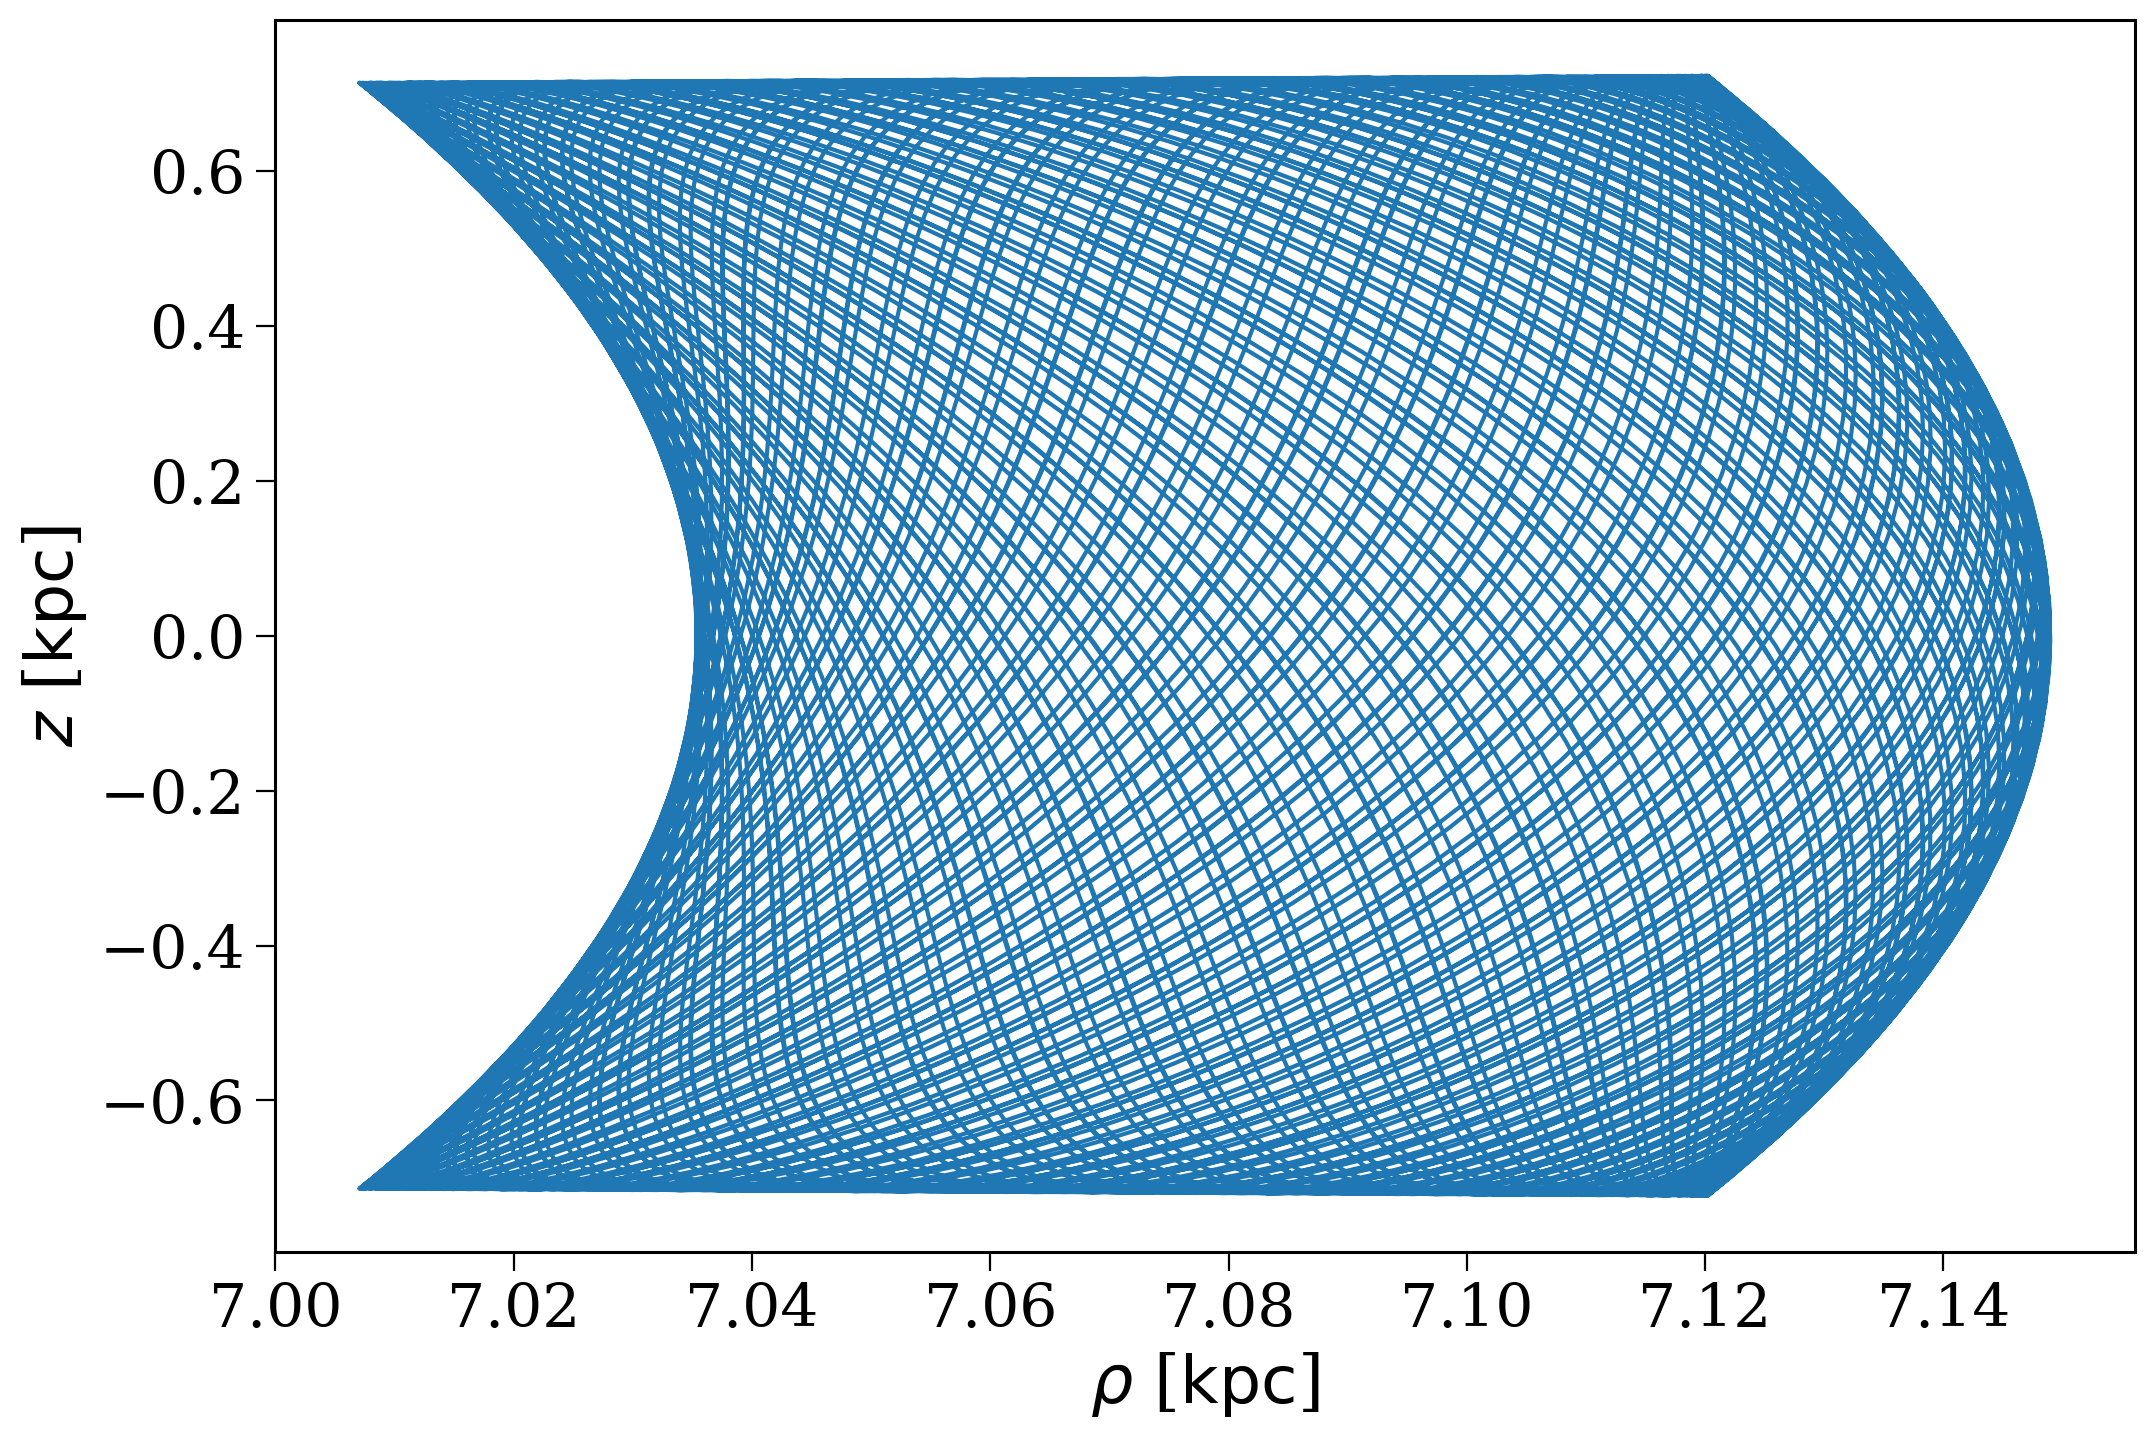

In [11]:
fig, ax = plt.subplots()
p.orbits[0].cylindrical.plot(["rho", "z"], axes=[ax]);

In [12]:
p.create_population()

Run for 1000 binaries
Ended up with 1290 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries


[1.2s] Evolve binaries (run COSMIC)


1295it [00:09, 132.76it/s]                          


[13.8s] Get orbits (run gala)
Overall: 15.0s


Check out the next tutorial to learn more about interpretting the outputs of these simulations.